EDA


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
cust_1=pd.read_csv(r'/content/drive/MyDrive/Customers.csv')

In [5]:
cust_1

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [6]:
prod_1=pd.read_csv(r'/content/drive/MyDrive/Products.csv')

In [7]:
prod_1

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [8]:
tran_1=pd.read_csv(r'/content/drive/MyDrive/Transactions.csv')

In [9]:
tran_1

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [10]:

print("Customers Dataset:")
print(cust_1.info())
print("\nProducts Dataset:")
print(prod_1.info())
print("\nTransactions Dataset:")
print(tran_1.info())

Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          

In [11]:
print("\nMissing Values:")
print("Customers:", cust_1.isnull().sum())
print("Products:", prod_1.isnull().sum())
print("Transactions:", tran_1.isnull().sum())


Missing Values:
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [12]:
print("\nSummary Statistics:")
print("Customers:", cust_1.describe(include='all'))
print("Products:", prod_1.describe(include='all'))
print("Transactions:", tran_1.describe(include='all'))


Summary Statistics:
Customers:        CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
Products:        ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN                 

EDA on Customer *data*

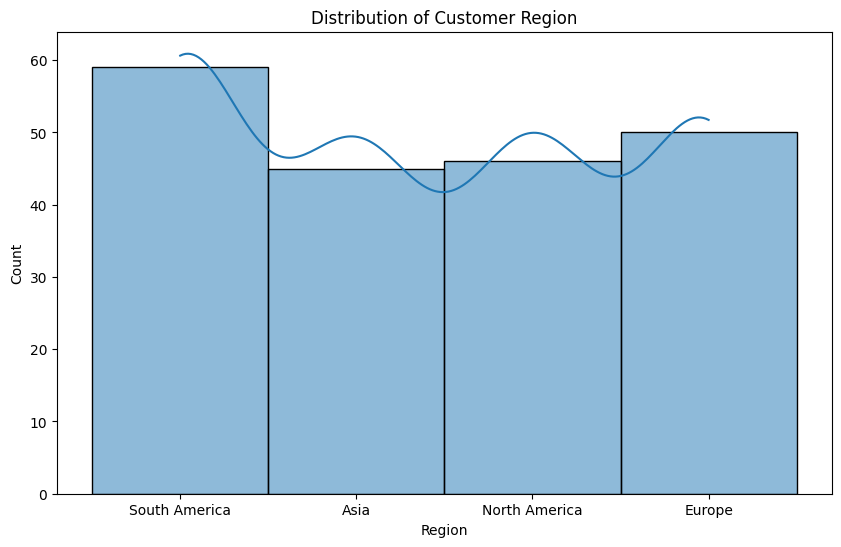

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(cust_1['Region'], kde=True)
plt.title('Distribution of Customer Region')
plt.show()

<ipython-input-29-a4d9fc0e5efc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cust_1, x='Region', palette='viridis')


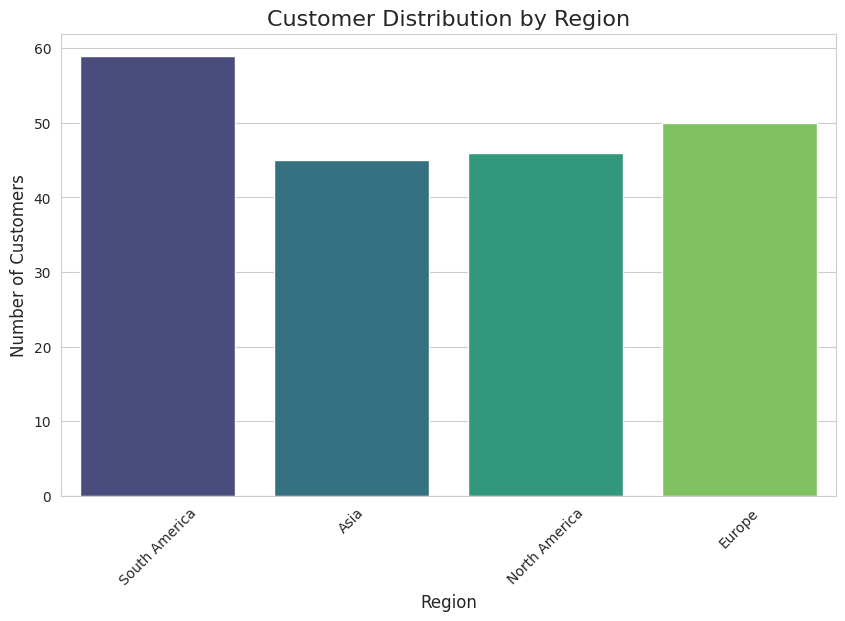

In [29]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(data=cust_1, x='Region', palette='viridis')
plt.title('Customer Distribution by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.show()

EDA on Product *data*

<ipython-input-32-4792cfcd18b0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=prod_1, x='Category', palette='viridis')


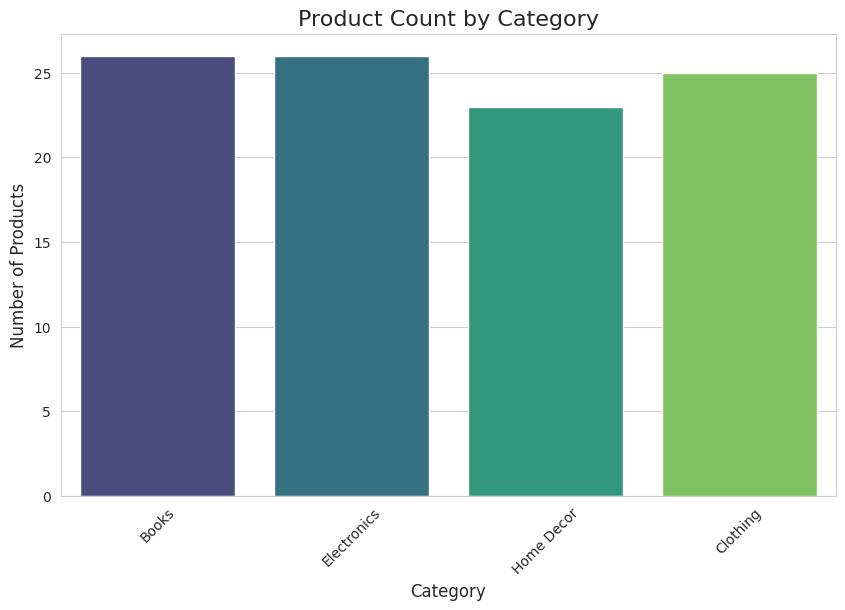

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(data=prod_1, x='Category', palette='viridis')
plt.title('Product Count by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45)
plt.show()

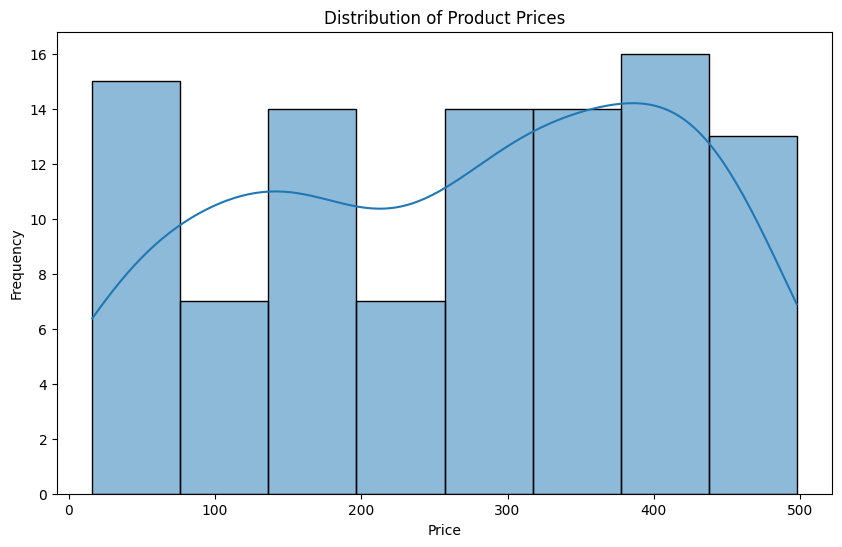

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(prod_1['Price'], kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


<ipython-input-34-9f39194cec00>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=prod_1, x='Category', y='Price', palette='coolwarm')


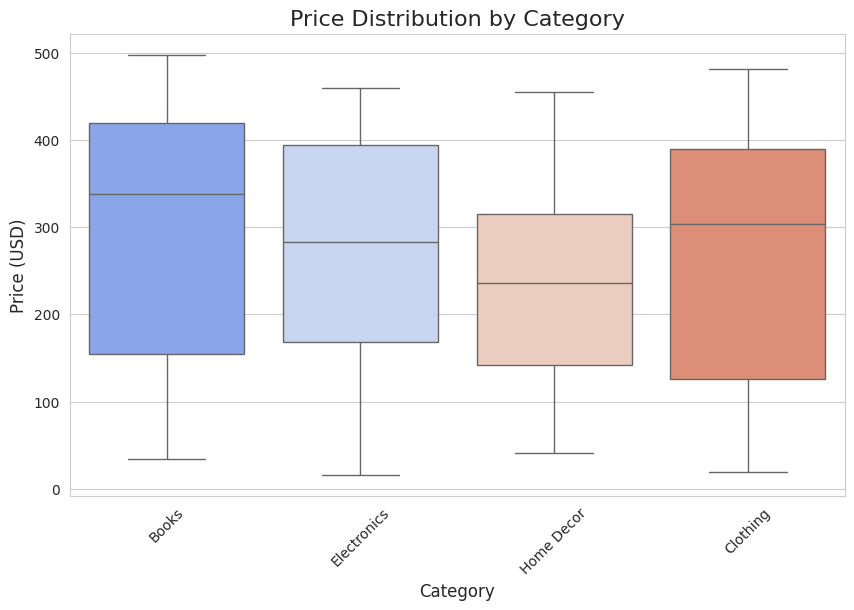

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=prod_1, x='Category', y='Price', palette='coolwarm')
plt.title('Price Distribution by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

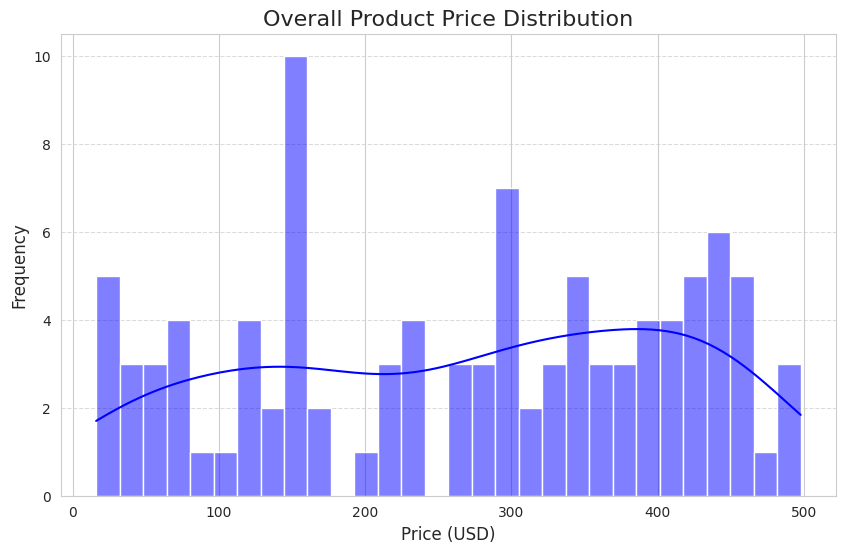

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(prod_1['Price'], bins=30, kde=True, color='blue')
plt.title('Overall Product Price Distribution', fontsize=16)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-38-206b1ad554d4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=prod_1, x='Category', y='Price', palette='coolwarm')


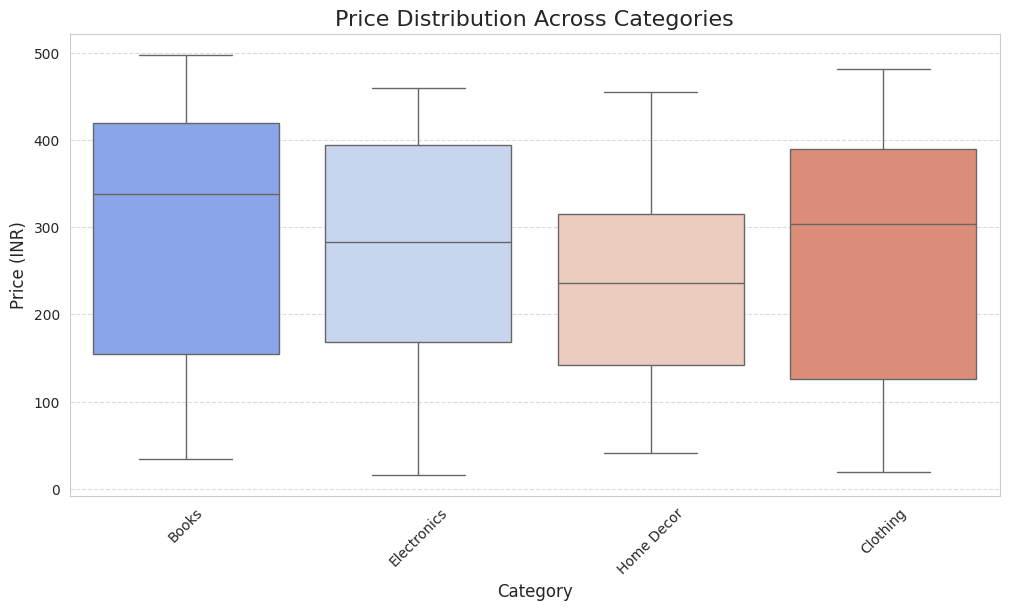

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=prod_1, x='Category', y='Price', palette='coolwarm')
plt.title('Price Distribution Across Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Price (INR)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [40]:
premium_threshold = prod_1['Price'].quantile(0.90)  # Top 10% of prices
budget_threshold = prod_1['Price'].quantile(0.10)  # Bottom 10% of prices

premium_products = prod_1[prod_1['Price'] >= premium_threshold]
budget_products = prod_1[prod_1['Price'] <= budget_threshold]

print(f"Number of Premium Products: {len(premium_products)}")
print(f"Number of Budget Products: {len(budget_products)}")


Number of Premium Products: 10
Number of Budget Products: 10


EDA On Transaction Dataset

In [43]:
tran_1['TransactionDate'] = pd.to_datetime(tran_1['TransactionDate'])


In [45]:
# Extracting year and month for trend analysis
tran_1['Year'] = tran_1['TransactionDate'].dt.year
tran_1['Month'] = tran_1['TransactionDate'].dt.month

In [47]:
monthly_sales = tran_1.groupby(['Year', 'Month'])['TotalValue'].sum().reset_index()


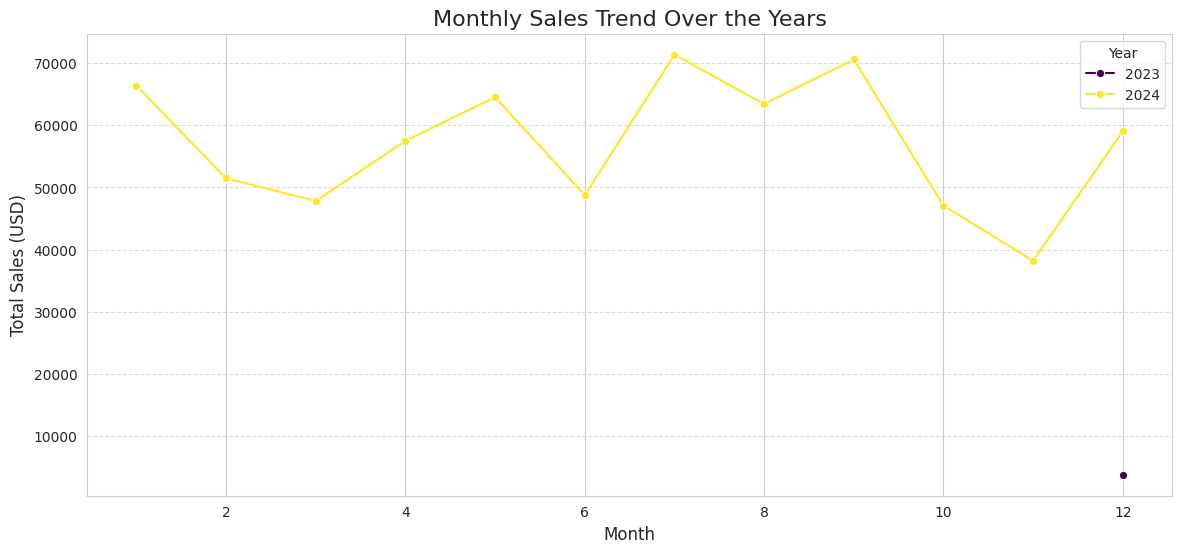

In [48]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='Month', y='TotalValue', hue='Year', marker='o', palette='viridis')
plt.title('Monthly Sales Trend Over the Years', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Year')
plt.show()

In [50]:
best_selling_products = tran_1.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)


This code snippet is creating a bar plot to visualize the top 10 best-selling products.

<ipython-input-51-6fca8fc33b31>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_selling_products.index, y=best_selling_products.values, palette='coolwarm')


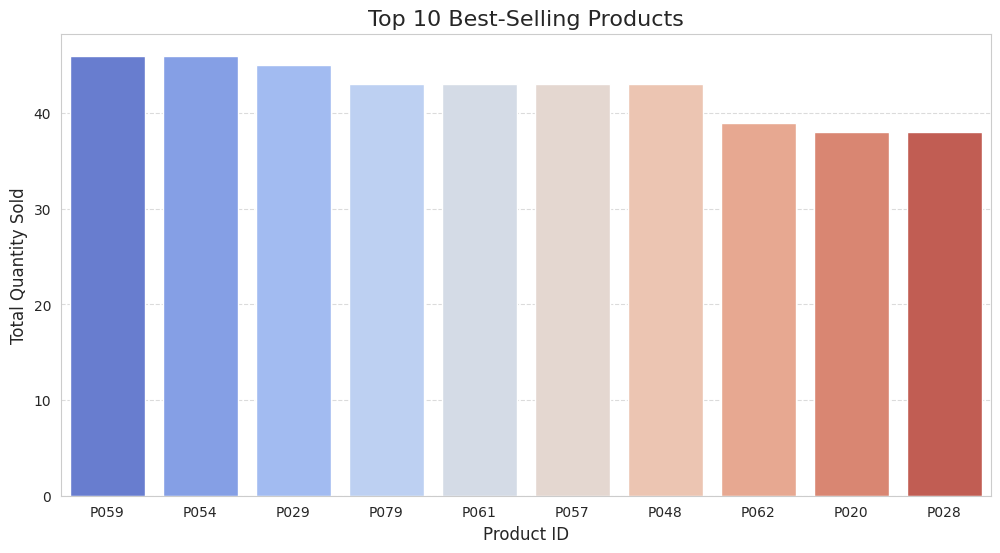

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(x=best_selling_products.index, y=best_selling_products.values, palette='coolwarm')
plt.title('Top 10 Best-Selling Products', fontsize=16)
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [53]:
regional_sales = tran_1.merge(cust_1, on='CustomerID').groupby('Region')['TotalValue'].sum().reset_index()




This code creates a bar plot to visualize the total sales value for each region. It's using the seaborn and matplotlib libraries in Python.

<ipython-input-55-b9e2ff085c68>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=regional_sales, x='Region', y='TotalValue', palette='magma')


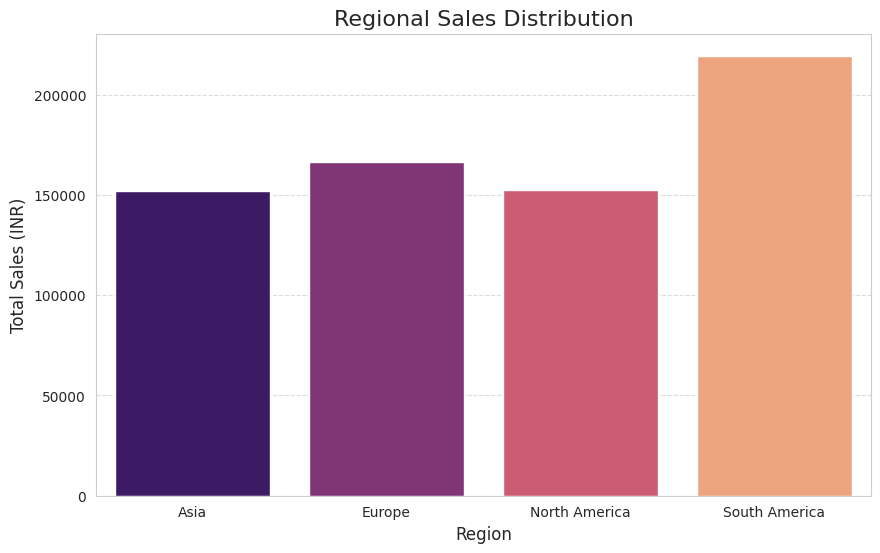

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(data=regional_sales, x='Region', y='TotalValue', palette='magma')
plt.title('Regional Sales Distribution', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales (INR)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()